In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_dir = '/content/drive/My Drive/Colab Notebooks'

In [6]:
import os

data_dir = '/content/drive/My Drive/Colab Notebooks'

# Check if the directory exists
if os.path.exists(os.path.join(data_dir, 'dog')):
    # List files in the directory
    file_list = os.listdir(os.path.join(data_dir, 'dog'))
    print("Files in 'dog' directory:", file_list)
else:
    print("Directory 'dog' does not exist in the specified path.")

Files in 'dog' directory: ['dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg', 'dog.4.jpg', 'dog.5.jpg']


In [9]:
data_dir = pathlib.Path(data_dir).with_suffix('')

In [10]:
data_dir

PosixPath('/content/drive/My Drive/Colab Notebooks')

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10


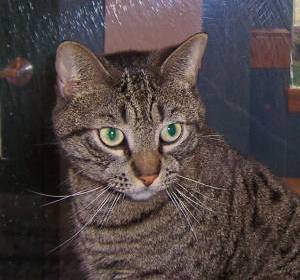

In [18]:
cat = list(data_dir.glob('cat/*'))
PIL.Image.open(str(cat[0]))

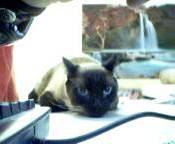

In [19]:
PIL.Image.open(str(cat[1]))

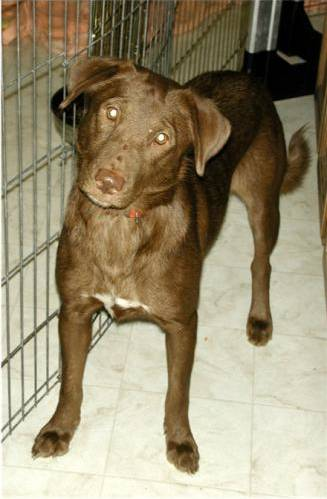

In [20]:
dog = list(data_dir.glob('dog/*'))
PIL.Image.open(str(dog[0]))

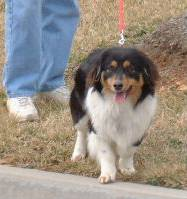

In [21]:
PIL.Image.open(str(dog[1]))

Create dataset

In [22]:
batch_size = 32
img_height = 180
img_width = 180

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10 files belonging to 2 classes.
Using 8 files for training.


In [24]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10 files belonging to 2 classes.
Using 2 files for validation.


In [25]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


Visualize data

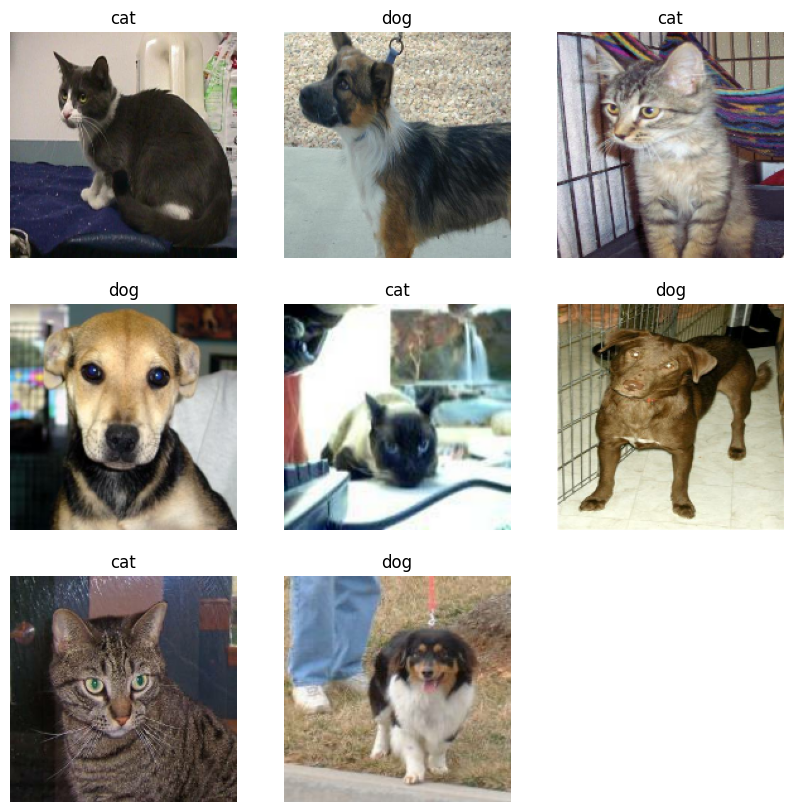

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [28]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 180, 180, 3)
(8,)


In [29]:
normalization_layer = layers.Rescaling(1./255)

In [30]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [31]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [34]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7063 - accuracy: 0.5000 - val_loss: 4.6771 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 322ms/step - loss: 3.5883 - accuracy: 0.5000 - val_loss: 0.7905 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 360ms/step - loss: 0.6575 - accuracy: 0.5000 - val_loss: 0.8204 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 313ms/step - loss: 0.6725 - accuracy: 0.5000 - val_loss: 0.6309 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 341ms/step - loss: 0.3823 - accuracy: 1.0000 - val_loss: 0.8203 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 296ms/step - loss: 0.4553 - accuracy: 0.6250 - val_loss: 0.7944 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 281ms/step - loss: 0.3931 - accuracy: 0.7500 - val_loss: 0.6221 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=======

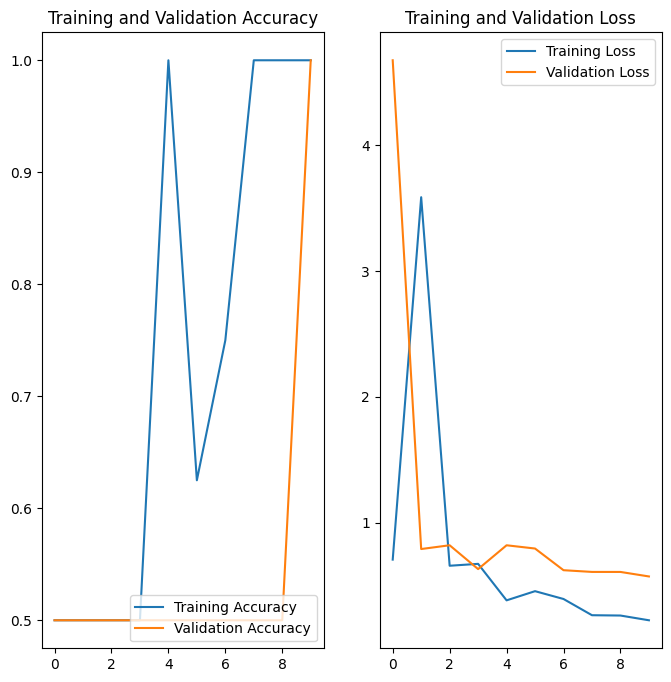

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
test_path = '/content/drive/My Drive/Colab Notebooks/test/dog_test.jpg'

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to cat with a 58.20 percent confidence.


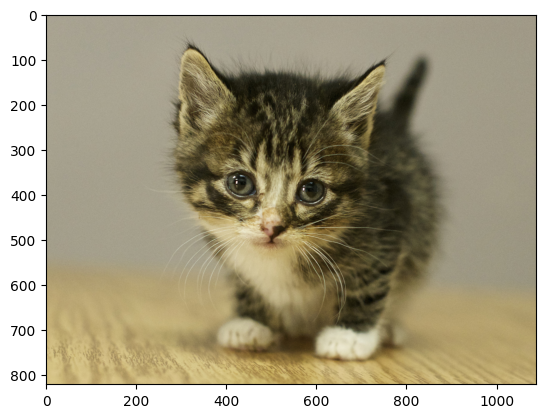

In [50]:
image = plt.imread('/content/drive/My Drive/Colab Notebooks/test/cat_test.jpg')

plt.imshow(image)
plt.show()

In [54]:
model.save('mymodel')

In [59]:
new_model = tf.keras.models.load_model('mymodel')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [61]:
test_path = '/content/drive/My Drive/Colab Notebooks/test/dog_test.jpg'

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 146ms/step
This image most likely belongs to cat with a 58.20 percent confidence.
